Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


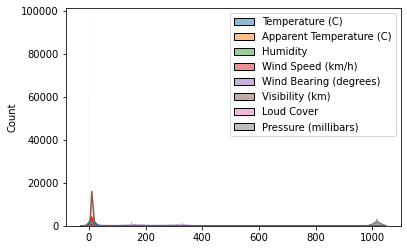

In [1]:
#10.1 - Exploração do banco de dados
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
df=pd.read_csv('../input/szeged-weather/weatherHistory.csv')
hist=sns.histplot(data=df, kde=True)
print(df.isnull().sum())
#RES:Os dados podem ter sido perdidos ou só não fizeram a previsão naquele dia

In [2]:
#RES:“Pressure(millibars)”. ´Porque parece haver uma concentração de colunas no 0 e a Pressure está sozinha no 1.000

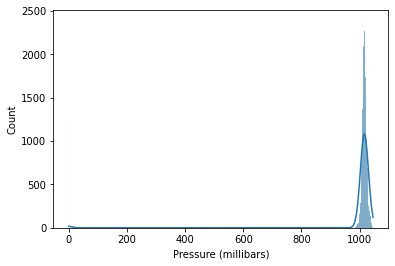

In [3]:
hist2=sns.histplot(data=df,x='Pressure (millibars)', kde=True)

In [4]:
display(df)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
#Identifique as features numéricas, aquelas que são do tipo “int64” ou “float64”, utilizando “.select_dtypes”
df.info()
num = df.loc[:,['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
categ = df.loc[:,['Summary','Precip Type','Daily Summary']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
#RES:'Formatted Date'

In [7]:
#Inspecione os valores únicos de cada feature categórica, para garantir que não há nenhum valor que ocorra apenas uma vez,
q1 = categ['Summary'].value_counts()
print(q1)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [8]:
q2 = categ['Precip Type'].value_counts()
print(q2)

rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [9]:
q3 = categ['Daily Summary'].value_counts()
print(q3)

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [10]:
#10.2 - Limpeza do banco de dados
# dropping null value columns to avoid errors
df2=df
# new data frame with split value columns
new = df2["Formatted Date"].str.split("+", n = 1, expand = True)
new2 = df2["Formatted Date"].str.split("+", n = 1, expand = True)
  
# making separate column from new data frame
df2["Formatted Date 2"]= new[0]
  
# Dropping columns
df2.drop(columns =["Formatted Date"], inplace = True)
df2

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Formatted Date 2
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00.000
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00.000
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00.000
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00.000


In [11]:
df2["Formatted Date 2"]=pd.to_datetime(df2["Formatted Date 2"])
df2['Date']=df2["Formatted Date 2"].dt.day
df2['Hora']=df2["Formatted Date 2"].dt.hour
df2['Month']=df2["Formatted Date 2"].dt.month
df2['Year']=df2["Formatted Date 2"].dt.year
df2.drop(columns =["Formatted Date 2",'Loud Cover'], inplace = True)
display(df2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Hora,Month,Year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,1,0,4,2006
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,1,1,4,2006
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1,2,4,2006
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,3,4,2006
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1,4,4,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,9,19,9,2016
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,9,20,9,2016
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,9,21,9,2016
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,9,22,9,2016


In [12]:
#Retirar a coluna “Loud Cover”, já que contém apenas valores nulos, e linhas cujo valor da coluna “Summary” aparecem apenas uma vez
df2=df2.loc[df2["Summary"]!="Dangerously Windy and Partly Cloudy"]
df2=df2.loc[df2["Summary"]!="Breezy and Dry"]
df2=df2.loc[df2["Summary"]!="Windy and Dry"]
df2

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Hora,Month,Year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,1,0,4,2006
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,1,1,4,2006
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1,2,4,2006
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1,3,4,2006
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1,4,4,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,9,19,9,2016
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,9,20,9,2016
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,9,21,9,2016
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,9,22,9,2016


In [13]:
q1 = df2['Summary'].value_counts()
q1

Partly Cloudy               31733
Mostly Cloudy               28094
Overcast                    16597
Clear                       10890
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Light Rain                     63
Breezy                         54
Windy and Overcast             45
Humid and Mostly Cloudy        40
Drizzle                        39
Windy and Mostly Cloudy        35
Breezy and Foggy               35
Dry                            34
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Rain                           10
Windy                           8
Humid and Overcast              7
Windy and Foggy                 4
Name: Summary, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
categ = [coln for coln in df2.columns if (df2[coln].dtype == 'object') & (coln != 'Daily Summary' )]
num = [coln for coln in df2.columns if df2[coln].dtype in ['float64', 'int64']]
feat = categ + num
target = df2['Daily Summary']
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean',add_indicator=True)
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encode', OrdinalEncoder())])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, num),('cat', categorical_transformer, categ)])
X_train, X_valid, y_train, y_valid = train_test_split(df2, target, test_size=0.3, stratify=target)
preprocessor.fit(X_train,y_train)
X_train=preprocessor.transform(X_train)
X_valid=preprocessor.transform(X_valid)
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_valid=le.transform(y_valid)
display(y_valid)
print(categ)

array([204, 209, 111, ..., 111, 155,  91])

['Summary', 'Precip Type']


In [15]:
#Construir arquitetura do modelo utilizando a descrição já informada
from tensorflow import keras
from tensorflow.keras import layers
num_de_saidas = len(target.unique())
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[13]),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_de_saidas,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1

2022-09-11 17:58:58.972242: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
#Realizar tratamento do target utilizando o método “utils.to_categorical” do keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y_train=tf.keras.utils.to_categorical(y_train,num_classes=num_de_saidas)
print(y_train.shape)
y_valid=tf.keras.utils.to_categorical(y_valid,num_classes=num_de_saidas)
print(y_valid.shape)


(67515, 214)
(28935, 214)


2022-09-11 17:58:59.441544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
23/23 - 4s - loss: 4.8528 - categorical_accuracy: 0.1333 - val_loss: 248.7592 - val_categorical_accuracy: 0.0279
Epoch 2/100
23/23 - 2s - loss: 3.8521 - categorical_accuracy: 0.2124 - val_loss: 190.6302 - val_categorical_accuracy: 0.0095
Epoch 3/100
23/23 - 2s - loss: 3.4577 - categorical_accuracy: 0.2387 - val_loss: 188.4291 - val_categorical_accuracy: 0.0095
Epoch 4/100
23/23 - 2s - loss: 3.2526 - categorical_accuracy: 0.2541 - val_loss: 178.8976 - val_categorical_accuracy: 0.0095
Epoch 5/100
23/23 - 2s - loss: 3.1134 - categorical_accuracy: 0.2611 - val_loss: 159.7159 - val_categorical_accuracy: 0.0095
Epoch 6/100
23/23 - 2s - loss: 3.0013 - categorical_accuracy: 0.2705 - val_loss: 127.5134 - val_categorical_accuracy: 0.0095
Epoch 7/100
23/23 - 2s - loss: 2.9155 - categorical_accuracy: 0.2781 - val_loss: 106.4103 - val_categorical_accuracy: 0.0095
Epoch 8/100
23/23 - 2s - loss: 2.8441 - categorical_accuracy: 0.2821 - val_loss: 82.9109 - val_categorical_accuracy: 0.0095
E

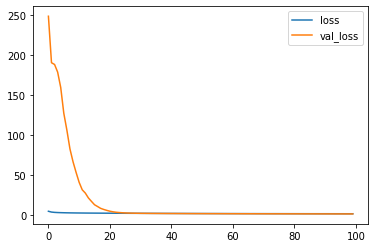

In [17]:
#Configurar o otimizador, a função de perda que será utilizada e a métrica para avaliação do modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping= EarlyStopping(min_delta=0.001,patience=10,restore_best_weights=True)

info_treino = 2

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=3000,
    epochs=100,
    verbose=info_treino,
    callbacks=[early_stopping],
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [18]:
history_df

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,4.852785,0.133259,248.759155,0.027890
1,3.852114,0.212353,190.630203,0.009470
2,3.457682,0.238658,188.429062,0.009470
3,3.252602,0.254062,178.897552,0.009470
4,3.113376,0.261142,159.715851,0.009470
...,...,...,...,...
95,1.770634,0.437843,1.562948,0.497287
96,1.764263,0.439710,1.554267,0.501158
97,1.758219,0.439517,1.542527,0.505236
98,1.753872,0.441117,1.551674,0.499153


Essa parte é um teste meu, quero ver se o problema da minha ter dado uma accuracy baixa foi porque minha tabela foi limpa de forma errada ou algo assim.

In [19]:
# Imputing binary values in type column 
df2.loc[df2['Precip Type']=='rain','Precip Type']=1
df2.loc[df2['Precip Type']=='snow','Precip Type']=0

In [20]:
weather_df2_num=df2[list(df2.dtypes[df2.dtypes!='object'].index)]

In [21]:
weather_df2_num

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Hora,Month,Year
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,0,4,2006
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,1,4,2006
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,2,4,2006
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,3,4,2006
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,4,4,2006
...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19,9,2016
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20,9,2016
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21,9,2016
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22,9,2016


In [22]:
weather_y = df2['Temperature (C)']
weather_X = weather_df2_num


In [23]:
train_X,test_X,train_y,test_y = train_test_split(weather_X,weather_y,test_size = 0.2,random_state=4)

In [24]:
train_X.drop(columns =['Temperature (C)'], inplace = True)

In [25]:
test_X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Hora,Month,Year
8800,17.155556,17.155556,0.38,3.7030,78.0,11.2056,1027.28,1,16,4,2007
86385,16.161111,16.161111,0.72,34.1642,150.0,9.9820,1016.56,16,13,10,2015
2082,9.805556,8.766667,0.83,8.1305,284.0,7.8729,1014.15,4,18,12,2006
49509,8.150000,8.150000,0.88,1.5295,160.0,8.1305,1019.42,30,22,3,2011
45194,17.927778,17.927778,0.94,4.9749,128.0,7.2128,1015.16,5,2,8,2011
...,...,...,...,...,...,...,...,...,...,...,...
45776,0.138889,-2.505556,0.93,7.8246,180.0,3.7030,1040.94,27,8,12,2011
78839,16.194444,16.194444,0.96,6.1502,341.0,14.3934,1014.28,7,2,9,2014
63111,-1.133333,-5.333333,0.88,12.7834,168.0,3.9123,1023.46,19,15,12,2013
54952,-5.988889,-10.394444,0.74,9.8210,184.0,6.3434,1015.82,14,16,2,2012


In [26]:
train_X.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Date,Hora,Month,Year
22527,27.038889,0.42,15.7619,160.0,9.9820,1009.14,4,15,6,2008
35251,11.105556,0.80,8.3076,273.0,11.2700,1012.64,15,19,4,2010
85700,6.716667,0.86,3.4293,271.0,7.9695,1016.83,18,0,11,2015
61166,17.127778,0.81,4.6368,275.0,11.0285,1022.08,28,14,9,2012
65276,25.200000,0.65,7.4221,303.0,10.3523,1014.77,19,20,7,2013


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [28]:
test_X
#O kaggle fica dando um bug aqui dizendo que o LINEARREGRESSION espera que X tenha 11 e X tem 10 ai é só usar esse cod:
test_X.drop(columns =['Temperature (C)'], inplace = True)

In [29]:
prediction = model.predict(test_X)
## Calculating the error 
np.mean((prediction-test_y)**2)

0.9063498298243705

In [30]:
data=pd.DataFrame({'actual':test_y,
             'prediction':prediction,
             'diff':(test_y-prediction)})
data

,actual,prediction,diff
8800,17.155556,17.418458,-0.262903
86385,16.161111,18.477677,-2.316566
2082,9.805556,9.732036,0.073519
49509,8.150000,8.587486,-0.437486
45194,17.927778,17.349867,0.577911
...,...,...,...
45776,0.138889,-0.293956,0.432845
78839,16.194444,15.898575,0.295869
63111,-1.133333,-2.251145,1.117812
54952,-5.988889,-6.720822,0.731933


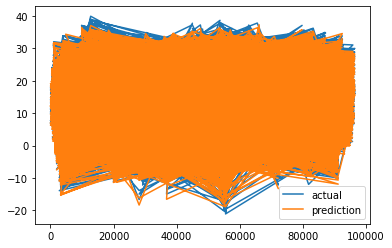

In [31]:
data.loc[:, ['actual', 'prediction']].plot();